<H1> Linear Regression</h1>

<h4> Formula for Univariate linear regression</h4>


y = b0 + b1*x1 <br>

y: dependent variable <br>

b0: constant <br>

b1: coefficient <br> 

x1: independent variable


<h2> Import Necessary Library </h2>

In [2]:
!pip install scikit-learn 

     ---------------------------------------- 9.3/9.3 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<img src="multiple_linear_regression.gif" width="750" align="center">

<img src="python-model.gif" width="750" align="center">

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h2>Read Dataset</h2> 

In [2]:
# df_simple = pd.read_csv('advertising.csv',usecols=['TV','Sales'])
df_simple = pd.read_csv('advertising.csv')

In [3]:
df_simple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<h2>Pre-processing</h2>

In [4]:
#here TV  is independent variable & Sales is dependent variable
df_simple = df_simple[["TV", "Sales"]]

In [5]:
df_simple.shape

(200, 2)

In [6]:
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [7]:
df_simple.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [8]:
df_simple.isnull().sum()

TV       0
Sales    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

corr = df_simple.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


<h2>Feature Engineering</h2>

In [10]:
X = df_simple[["TV"]]
y = df_simple["Sales"]

<h3>Train Test split</h3>

In [11]:
# most of the time we use train test split of 80/20.
# random_state=42 ensures that the random process generates the same results each time you run your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4>Load regression model</h4>

In [12]:
model = LinearRegression()

<h2>Training of the model</h2>

<h4>Fit data into model</h4>

In [13]:
model.fit(X_train,y_train) 

LinearRegression()

In [14]:
import os

# Define the folder name
folder_name = "model"

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")


Folder 'model' already exists.


<h4>saving model to disk</h4>

In [15]:
# save the model to disk
filename = 'model/linear_model.sav'
pickle.dump(model, open(filename, 'wb'))

<h4>Prediction on Test Data</h4>

In [16]:
y_pred = model.predict(X_test)

<h3>Visualization of Training Data</h3>

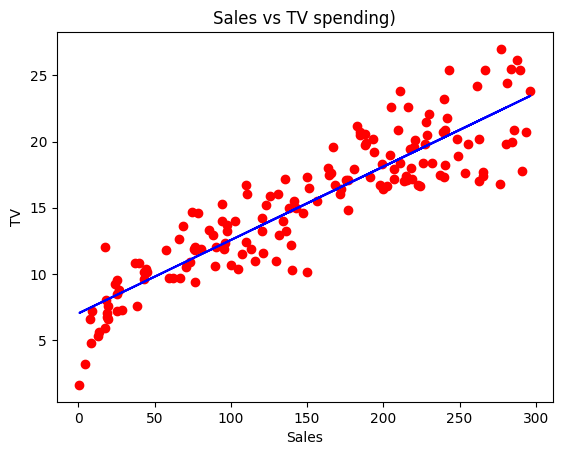

In [17]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, model.predict(X_train), color='blue')
viz_train.title('Sales vs TV spending)')
viz_train.xlabel('Sales')
viz_train.ylabel('TV')
viz_train.show()

<h3>Visualization of Testing Data </h3>

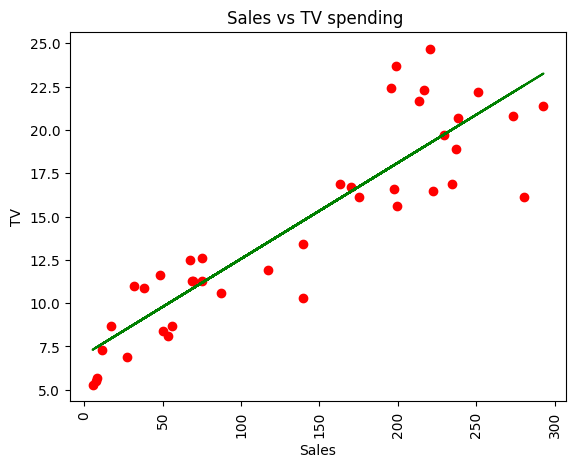

In [18]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, model.predict(X_test), color = "green")
plt.title("Sales vs TV spending ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

<h2>Model Evaluation</h2>

In [24]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is :", r_squared)

The R2 error is : 0.802561303423698


 80.3 % of the variance in the dependent variable (the target) can be explained by the independent variables (the features) in the regression model

In [24]:
# view y intercept 
model.intercept_

7.007108428241848

In [25]:
#view slope
model.coef_[0]

0.0554829439314632

In [27]:
# import warnings
# warnings.filterwarnings("ignore")

In [29]:
# print("Predicted Sales :",round(lr.predict([[300]])[0],2))
model.predict([[49]])

array([9.72577268])

In [35]:
y = model.intercept_ + model.coef_* 49

In [38]:
# print("Predicted Sales :",round(y[0],2))
print("Predicted Sales :", y)

Predicted Sales : [9.72577268]


<h4>loading model to disk</h4>

In [40]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([[49]])
print(result)

[9.72577268]


In [41]:
# Create a list of lists with values to predict
values_to_predict = [[49], [60], [72], [85]]

# Make predictions for each set of values
predictions = loaded_model.predict(values_to_predict)

# Print the predictions
for i, value in enumerate(values_to_predict):
    print(f"Input: {value}, Prediction: {predictions[i]}")

Input: [49], Prediction: 9.725772680883544
Input: [60], Prediction: 10.33608506412964
Input: [72], Prediction: 11.001880391307198
Input: [85], Prediction: 11.72315866241622


<h1> Multivariate linear regression </h1>

Formula: <br>
y = b0 + b1 * x1 + b2 * x2 + b3 * x3

<h2>Read Dataset</h2>

In [5]:
df_multiple = pd.read_csv('advertising.csv')

In [6]:
df_multiple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df_multiple.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<h2>Data preprocessing</h2>

In [8]:
df_multiple.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

corr = df_multiple.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<h2> Feature Engineering </h2>

In [10]:
X = df_multiple[["TV","Radio","Newspaper"]]
y = df_multiple["Sales"]

<h3>Train Test Split</h3>

In [11]:
# most of the time we use train test split of 80/20.
# random_state=42 ensures that the random process generates the same results each time you run your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2>Load and Train Model</h2>

In [12]:
model = LinearRegression()


In [13]:
model.fit(X_train,y_train)

LinearRegression()

<h2>Evaluation of trained Model</h2>

<h3>Predict on Test Data</h3>

In [14]:
y_pred = model.predict(X_test)

In [15]:
r_squared = r2_score(y_test,y_pred)

In [16]:
r_squared

0.9059011844150826

r_squared = 0.906 means  90.6% of the variance in the dependent variable (the target) can be explained by the independent variables (the features) in the regression model

In [17]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [18]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))


Adjusted R Squared: % 90.45 R Squared: % 90.59


In [19]:
print("Intercept is ", model.intercept_,"and Coefficients are", model.coef_)

Intercept is  4.714126402214127 and Coefficients are [0.05450927 0.10094536 0.00433665]


In [20]:
model.coef_


array([0.05450927, 0.10094536, 0.00433665])

<h3>Prediction on New Data</h3>

Coefficient for TV :  <b>0.05444578</b>  <br>
Coefficient for Radio : <b>0.10700123 </b><br>
Coefficient for Newspaper : <b>0.00033566

Let's find out how many units we will sell if we spend : <br>
200 Dollars on TV advertising  <br>
50 Dollars on Radio  <br>
20 Dollars on Newspaper


In [23]:
# the round function is used to round the prediction to two decimal places
round(model.predict([[200,50,20]])[0],2)

C:\Users\sajjan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.75

In [25]:
# by using ıntercept and coefficients

y = model.intercept_ + model.coef_[0] * 200 + model.coef_[1] * 50 + model.coef_[2] * 20

In [67]:
round(y,2)


20.74